In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [110]:
arrivalForeign = pd.read_csv("llegada_mensual_pasajeros_aeropuerto_de_origen_internacional.csv")
arrivalNational = pd.read_csv("llegada_pasajeros_mensual_por_aeropuerto_de_origen_nacional.csv")

#### Foreign

##### Arrivals

In [111]:
arrivalForeign["Year"] = arrivalForeign["lle_periodo"].apply(lambda x: int(str(x)[:4]))
arrivalForeign["Month"] = arrivalForeign["lle_periodo"].apply(lambda x: int(str(x)[4:]))
arrivalForeign.drop(columns=["lle_periodo"], inplace=True)
arrivalForeign = arrivalForeign[arrivalForeign["Year"] < 2023]

In [112]:
countries = arrivalForeign["lle_origenpax"].unique()
# Define a dictionary to map countries to continents
continent_map = {
    'Japón': 'Asia', 'Qatar': 'Asia', 'Guatemala': 'North America', 'Suiza': 'Europe', 'Islas Caimán': 'North America',
    'Portugal': 'Europe', 'Bahamas': 'North America', 'España': 'Europe', 'Emiratos Árabes Unidos': 'Asia', 'Barbados': 'North America',
    'San Cristóbal y Nieves': 'North America', 'Honduras': 'North America', 'Jamaica': 'North America', 'Cuba': 'North America',
    'República Dominicana': 'North America', 'Reino Unido': 'Europe', 'Israel': 'Asia', 'Antillas Neerlandesas': 'North America',
    'Suecia': 'Europe', 'México': 'North America', 'Alemania': 'Europe', 'Países Bajos': 'Europe', 'Perú': 'South America',
    'Bélgica': 'Europe', 'Turquía': 'Asia', 'Trinidad y Tobago': 'North America', 'Panamá': 'North America', 'Canadá': 'North America',
    'Argentina': 'South America', 'haiti': 'North America', 'Chile': 'South America', 'Costa Rica': 'North America', 'Puerto Rico': 'North America',
    'El Salvador': 'North America', 'Estados Unidos': 'North America', 'Italia': 'Europe', 'Brasil': 'South America', 'Francia': 'Europe',
    'Corea del Sur': 'Asia', 'Marruecos': 'Africa', 'Australia': 'Australia', 'Ecuador': 'South America', 'Guyana': 'South America',
    'Bolivia': 'South America', 'Surinam': 'South America', 'Paraguay': 'South America', 'Belice': 'North America', 'Nicaragua': 'North America',
    'antigua and barbuda': 'North America', 'Venezuela': 'South America', 'Noruega': 'Europe', 'india': 'Asia', 'Uruguay': 'South America',
    'Nueva Zelanda': 'Australia', 'Dinamarca': 'Europe', 'Haití': 'North America', 'Jordania': 'Asia', 'Croacia': 'Europe', 'China': 'Asia',
    'Senegal': 'Africa', 'Sudáfrica': 'Africa', 'saint lucia': 'North America', 'Irlanda': 'Europe', 'Austria': 'Europe', 'Grecia': 'Europe',
    'Rusia': 'Europe', 'Colombia': 'South America', 'Bermudas': 'North America', 'Filipinas': 'Asia', 'San Vicente y las Granadinas': 'North America',
    'Santa Lucia': 'North America', 'Islandia': 'Europe', 'Antillas Francesas': 'North America', 'Rumania': 'Europe', 'Dominica': 'North America',
    'Hong Kong': 'Asia', 'Líbano': 'Asia', 'ISLAS VÍRGENES BRITÁNICAS': 'North America', 'Costa de Marfil': 'Africa', 'Luxemburgo': 'Europe',
    'Otros países del Caribe': 'North America', 'Guam': 'Australia', 'Hungría': 'Europe'
}

# Filter the countries to include only those in the "countries" variable
filtered_continent_map = {country: continent for country, continent in continent_map.items() if country in countries}

In [113]:
EuropeCountries = [country for country, continent in filtered_continent_map.items() if continent == 'Europe']
AsiaCountries = [country for country, continent in filtered_continent_map.items() if continent == 'Asia']
NorthAmericaCountries = [country for country, continent in filtered_continent_map.items() if continent == 'North America']
SouthAmericaCountries = [country for country, continent in filtered_continent_map.items() if continent == 'South America']
AfricaCountries = [country for country, continent in filtered_continent_map.items() if continent == 'Africa']

In [114]:
df_Africa = arrivalForeign[arrivalForeign["lle_origenpax"].isin(AfricaCountries)]
df_Asia = arrivalForeign[arrivalForeign["lle_origenpax"].isin(AsiaCountries)]
df_Europe = arrivalForeign[arrivalForeign["lle_origenpax"].isin(EuropeCountries)]
df_NorthAmerica = arrivalForeign[arrivalForeign["lle_origenpax"].isin(NorthAmericaCountries)]
df_SouthAmerica = arrivalForeign[arrivalForeign["lle_origenpax"].isin(SouthAmericaCountries)]

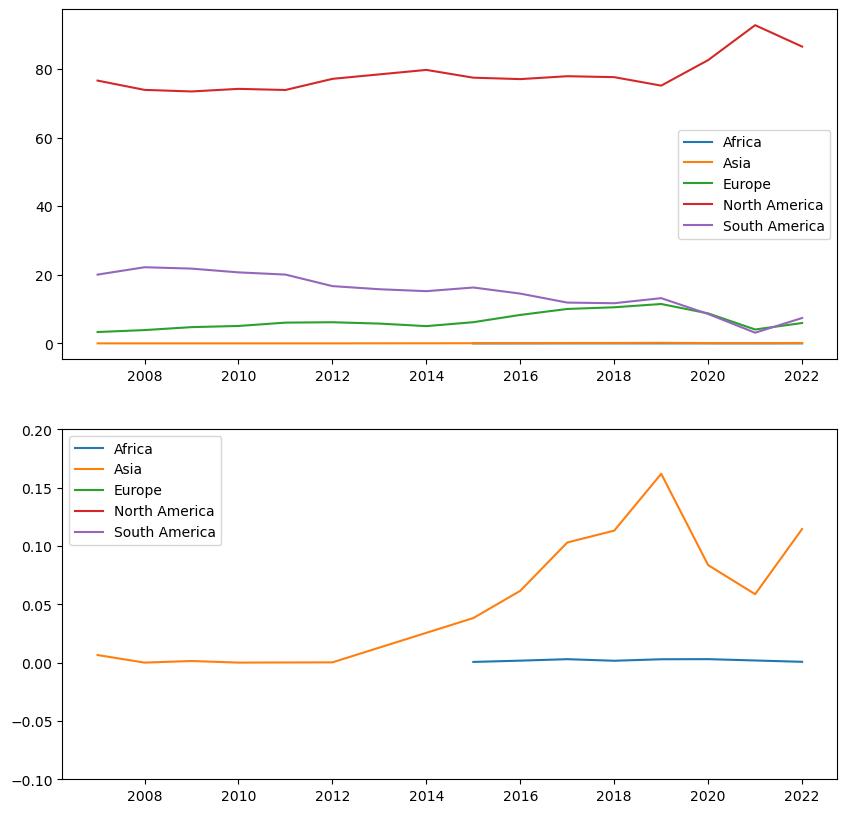

In [117]:
countries_dfs = [df_Africa, df_Asia, df_Europe, df_NorthAmerica, df_SouthAmerica]
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America']
TotalArrivals = arrivalForeign[["Year","lle_valor"]].groupby(by = "Year").sum()


fig, ax = plt.subplots(2,1,figsize=(10,10))
for i, df in enumerate(countries_dfs):
    data = df[["Year", "lle_valor"]].groupby(["Year"]).sum().reset_index()
    data = data.merge(TotalArrivals, on="Year", suffixes=("", "_total"))
    data["percentage"] = (data["lle_valor"] / data["lle_valor_total"]) * 100

    ax[0].plot(data["Year"], data["percentage"], label=continents[i])
    ax[1].plot(data["Year"], data["percentage"], label=continents[i])

ax[0].legend()
ax[1].set_ylim(-0.1, 0.2)
ax[1].legend()
plt.show()


##### Departures

In [158]:
departureForeign = pd.read_csv("salida_mensual_pasajeros_aeropuerto_destino_internacional.csv")

In [159]:
# Extract Year and Month from sal_periodo
departureForeign["Year"] = departureForeign["sal_periodo"].apply(lambda x: int(str(x)[:4]))
departureForeign["Month"] = departureForeign["sal_periodo"].apply(lambda x: int(str(x)[4:]))
departureForeign.drop(columns=["sal_periodo"], inplace=True)
departureForeign = departureForeign[departureForeign["Year"] < 2023]

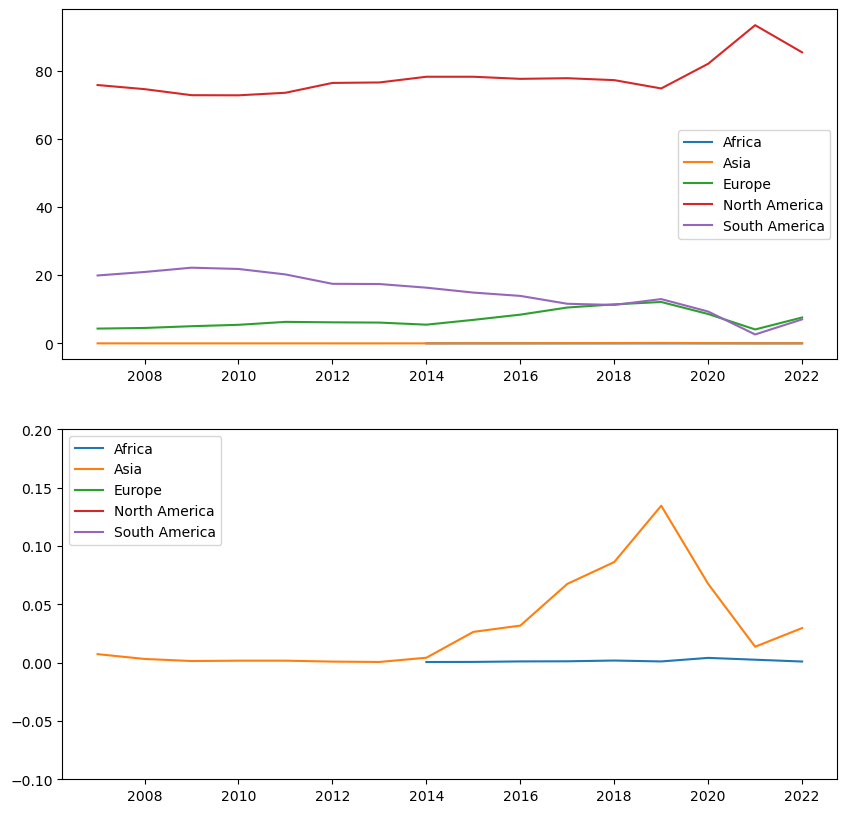

In [160]:
# Create dataframes for each continent
df_Africa_departure = departureForeign[departureForeign["sal_destinoint"].isin(AfricaCountries)]
df_Asia_departure = departureForeign[departureForeign["sal_destinoint"].isin(AsiaCountries)]
df_Europe_departure = departureForeign[departureForeign["sal_destinoint"].isin(EuropeCountries)]
df_NorthAmerica_departure = departureForeign[departureForeign["sal_destinoint"].isin(NorthAmericaCountries)]
df_SouthAmerica_departure = departureForeign[departureForeign["sal_destinoint"].isin(SouthAmericaCountries)]

# List of dataframes and continents
countries_dfs_departure = [df_Africa_departure, df_Asia_departure, df_Europe_departure, df_NorthAmerica_departure, df_SouthAmerica_departure]
continents_departure = ['Africa', 'Asia', 'Europe', 'North America', 'South America']
TotalDepartures = departureForeign[["Year","sal_valor"]].groupby(by = "Year").sum()

# Plot the data
fig, ax = plt.subplots(2,1,figsize=(10,10))
arrivalsPerYear = {}
for i, df in enumerate(countries_dfs_departure):
    data = df[["Year", "sal_valor"]].groupby(["Year"]).sum().reset_index()
    data = data.merge(TotalDepartures, on="Year", suffixes=("", "_total"))
    data["percentage"] = (data["sal_valor"] / data["sal_valor_total"]) * 100
    arrivalsPerYear[continents_departure[i]] = data
    ax[0].plot(data["Year"], data["percentage"], label=continents_departure[i])
    ax[1].plot(data["Year"], data["percentage"], label=continents_departure[i])

ax[0].legend()
ax[1].set_ylim(-0.1, 0.2)
ax[1].legend()
plt.show()

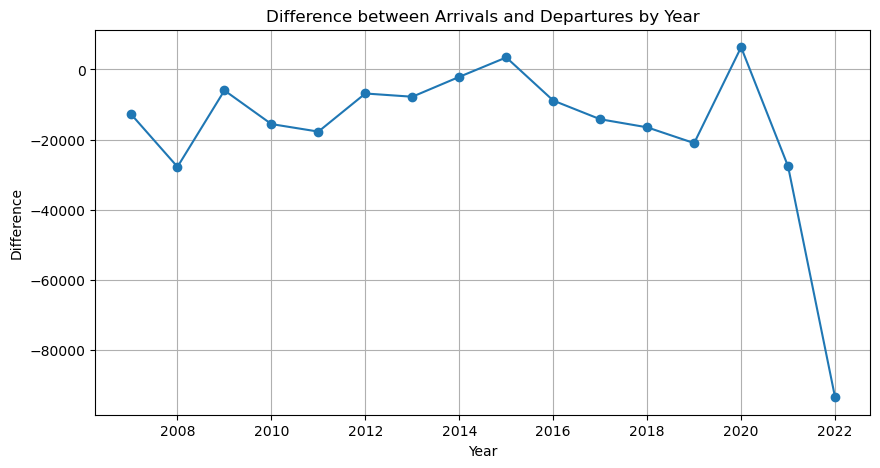

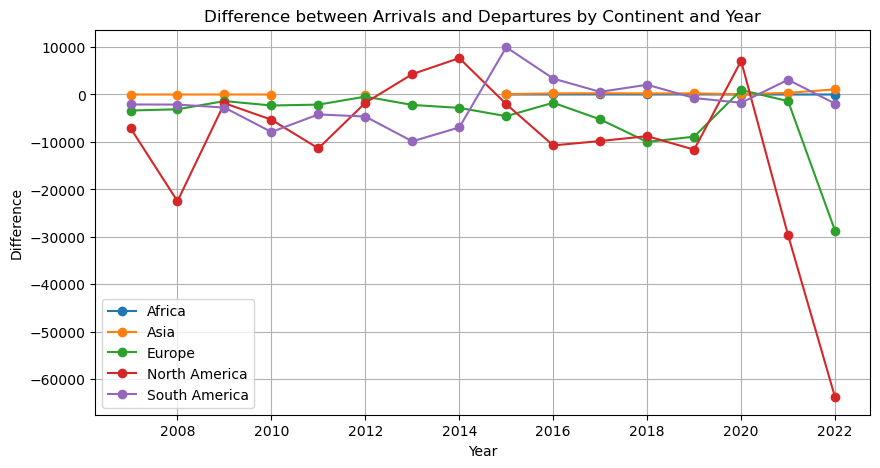

In [122]:
# Calculate the difference between arrivals and departures
difference = TotalArrivals["lle_valor"] - TotalDepartures["sal_valor"]

# Create a new DataFrame to store the results
difference_df = pd.DataFrame({
    "Year": TotalArrivals.index,
    "Difference": difference
})

# Plot the difference by year
plt.figure(figsize=(10, 5))
plt.plot(difference_df["Year"], difference_df["Difference"], marker='o')
plt.title("Difference between Arrivals and Departures by Year")
plt.xlabel("Year")
plt.ylabel("Difference")
plt.grid(True)
plt.show()
# Calculate the difference by continent
continent_differences = []
for i, continent in enumerate(continents):
    arrivals = countries_dfs[i][["Year", "lle_valor"]].groupby("Year").sum()
    departures = countries_dfs_departure[i][["Year", "sal_valor"]].groupby("Year").sum()
    difference = arrivals["lle_valor"] - departures["sal_valor"]
    continent_differences.append(difference)

# Plot the difference by continent
fig, ax = plt.subplots(figsize=(10, 5))
for i, difference in enumerate(continent_differences):
    ax.plot(difference.index, difference, marker='o', label=continents[i])

ax.set_title("Difference between Arrivals and Departures by Continent and Year")
ax.set_xlabel("Year")
ax.set_ylabel("Difference")
ax.legend()
ax.grid(True)
plt.show()

### Local

### arrivals

In [133]:
arrivalsLocal = pd.read_csv("llegada_pasajeros_mensual_por_aeropuerto_de_origen_nacional.csv")

In [136]:
arrivalsLocal["Year"] = arrivalsLocal["lle_periodo"].apply(lambda x: int(str(x)[:4]))
arrivalsLocal["Month"] = arrivalsLocal["lle_periodo"].apply(lambda x: int(str(x)[4:]))
arrivalsLocal.drop(columns=["lle_periodo"], inplace=True)
arrivalsLocal = arrivalsLocal[arrivalsLocal["Year"] < 2023]

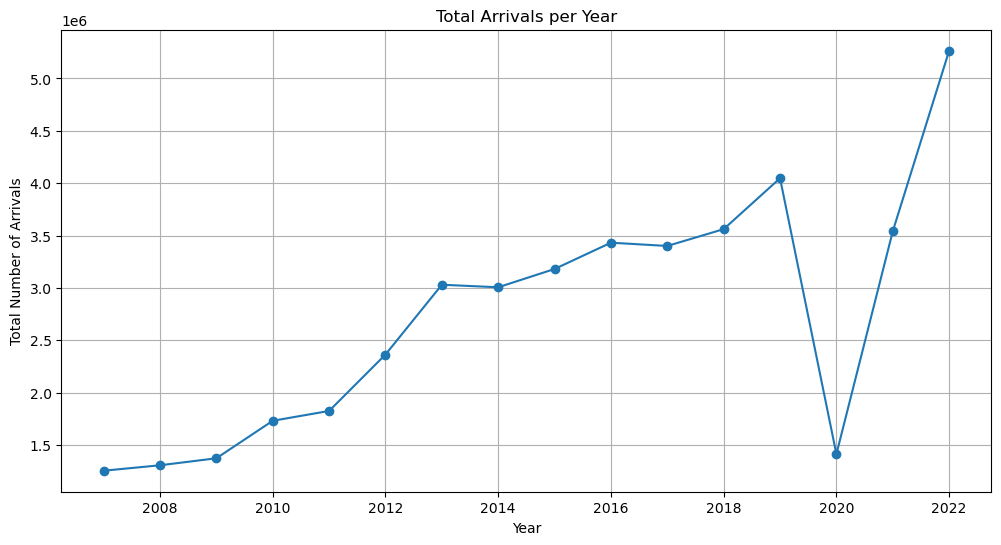

In [143]:
# Group the data by Year and Month and sum the values
monthly_arrivals = arrivalsLocal.groupby(['Year', 'Month'])['lle_valor'].sum().reset_index()

total_yearly_arrivals = monthly_arrivals.groupby('Year')['lle_valor'].sum()

# Plot the total number of arrivals per year
plt.figure(figsize=(12, 6))
plt.plot(total_yearly_arrivals.index, total_yearly_arrivals.values, marker='o')
plt.title('Total Arrivals per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Arrivals')
plt.grid(True)
plt.show()